In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pymc as pm
import arviz as az

from thesis_tools.utils.data import *
from thesis_tools.models.bayesian_univariate_time_series import *

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
df = read_panel_data(observations_threshold=50)
df = df[df['group'] == 'Germany'] 

/Users/philipphocker/Documents/GitHub/top_wealth_thesis/thesis_tools/utils/data.py:251: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_FTSE100['Date'] = pd.to_datetime(df_FTSE100['Date'])


In [3]:
df

,group,year,gdp_pc,CAC40,DAX,FTSE100,MOEX,MSCI,NIFTY,OMX40,...,log_change_CAC40,log_change_DAX,log_change_FTSE100,log_change_MOEX,log_change_MSCI,log_change_NIFTY,log_change_OMX40,log_change_SPX,log_change_SSE,constant
45,Germany,2010,41572.455948,3739.459961,5608.790039,5188.52,NaN,1119.500000,4882.049805,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
46,Germany,2011,46705.895796,4005.500000,7077.479980,5862.94,NaN,1331.699951,5505.899902,NaN,...,0.068727,0.232583,0.122203,NaN,0.173574,0.120255,NaN,0.180361,-0.068746,1
47,Germany,2012,43855.854466,3298.550049,6458.910156,5681.61,NaN,1273.699951,5199.250000,NaN,...,-0.194185,-0.091457,-0.031417,NaN,-0.044530,-0.057306,NaN,0.020235,-0.196599,1
48,Germany,2013,46298.922918,3732.600098,7776.049805,6276.88,NaN,1416.800049,6034.750000,NaN,...,0.123622,0.185588,0.099638,NaN,0.106475,0.149020,NaN,0.132339,0.039685,1
49,Germany,2014,48023.869985,4165.720215,9306.480469,6510.44,1454.050049,1598.500000,6089.500000,NaN,...,0.109784,0.179663,0.036534,NaN,0.120665,0.009032,NaN,0.173863,-0.159823,1
50,Germany,2015,41103.256436,4604.250000,10694.320313,6749.40,1647.689941,1677.500000,8808.900391,1506.40,...,0.100091,0.139002,0.036047,0.125021,0.048239,0.369197,NaN,0.112572,0.456831,1
51,Germany,2016,42136.120791,4417.020020,9798.110352,6083.79,1784.920044,1562.199951,7563.549805,1472.30,...,-0.041515,-0.087523,-0.103826,0.079999,-0.071210,-0.152422,-0.022897,-0.027827,-0.159302,1
52,Germany,2017,44652.589172,4748.899902,11535.309570,7099.15,2217.389893,1805.500000,8561.299805,1493.35,...,0.072448,0.163223,0.154347,0.216957,0.144743,0.123911,0.014196,0.160868,0.143226,1
53,Germany,2018,47939.278288,5481.930176,13189.480469,7533.55,2289.989990,2171.500000,11027.700195,1594.35,...,0.143544,0.134007,0.059391,0.032217,0.184581,0.253158,0.065444,0.214407,0.096964,1
54,Germany,2019,46805.138433,4992.720215,11173.099609,6968.85,2521.100098,2029.599976,10830.950195,1472.32,...,-0.093476,-0.165911,-0.077916,0.096148,-0.067579,-0.018003,-0.079627,-0.043318,-0.297712,1


In [4]:
model = Univariate_GeneralisedPareto_TimeSeries(
    panel_df=df
)

In [5]:
model.fit()

In [6]:
trace = model.get_trace()

/Users/philipphocker/Documents/GitHub/top_wealth_thesis/thesis_venv/lib/python3.12/site-packages/arviz/plots/traceplot.py:223: UserWarning: rcParams['plot.max_subplots'] (20) is smaller than the number of variables to plot (40), generating only 20 plots
  warnings.warn(


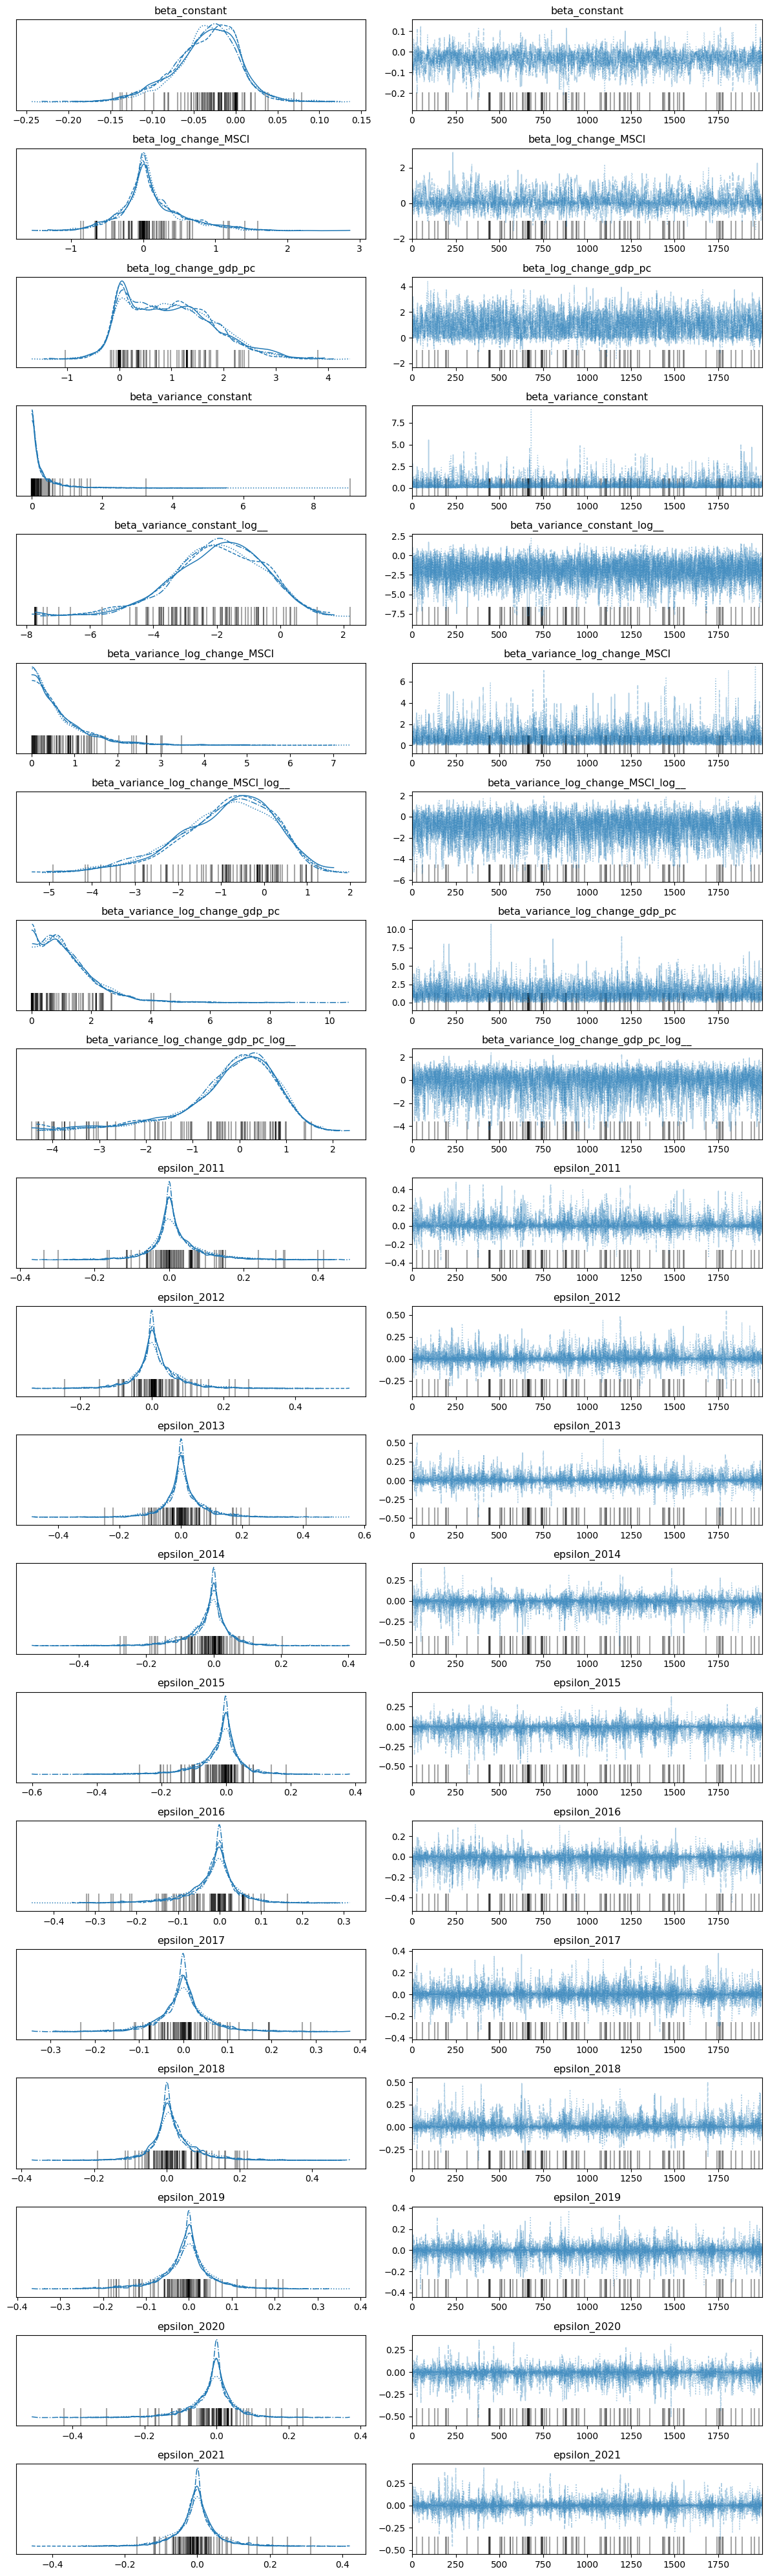

In [7]:
az.plot_trace(trace)
plt.tight_layout()

In [8]:
az.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
beta_constant,-0.035,0.040,-0.115,0.035,0.001,0.001,1384.0,1792.0,1.00
beta_log_change_MSCI,0.116,0.446,-0.688,1.092,0.013,0.009,1285.0,1693.0,1.00
beta_log_change_gdp_pc,0.969,0.826,-0.282,2.534,0.019,0.013,1909.0,3857.0,1.00
beta_variance_constant,0.326,0.493,0.000,1.125,0.007,0.005,3459.0,3091.0,1.00
beta_variance_constant_log__,-1.990,1.468,-4.733,0.672,0.026,0.022,3459.0,3091.0,1.00
beta_variance_log_change_MSCI,0.679,0.700,0.004,1.849,0.012,0.009,2528.0,3535.0,1.00
beta_variance_log_change_MSCI_log__,-0.921,1.165,-3.297,0.991,0.024,0.017,2528.0,3535.0,1.00
beta_variance_log_change_gdp_pc,1.209,0.949,0.012,2.849,0.017,0.012,2150.0,1968.0,1.00
beta_variance_log_change_gdp_pc_log__,-0.197,1.047,-2.348,1.479,0.026,0.019,2150.0,1968.0,1.00
epsilon_2011,0.017,0.073,-0.117,0.175,0.001,0.001,4782.0,2261.0,1.01


In [9]:
with model.model:
    post = pm.sample_posterior_predictive(trace)

Sampling: [y_2010, y_2011, y_2012, y_2013, y_2014, y_2015, y_2016, y_2017, y_2018, y_2019, y_2020, y_2021, y_2022]


Output()

In [10]:
post_2018 = post['posterior_predictive']['y_2018'].values.flatten()

In [11]:
log_post_2018 = np.log(post_2018)

In [12]:
np.mean(post_2018)

4.687091840826401

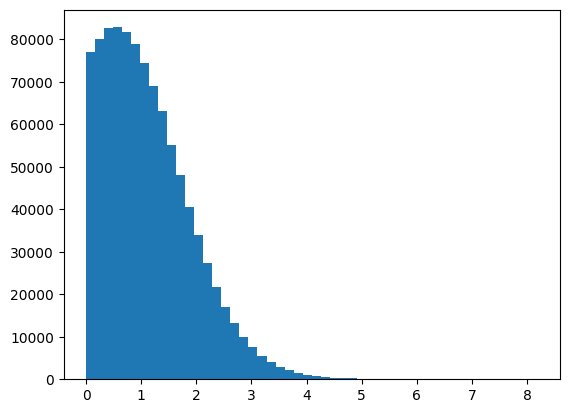

In [13]:
plt.hist(log_post_2018, bins=50)
plt.show()